### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

### Helper Function

#### Crop image

In [2]:
def show_image(filename, title=None):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(14,6))
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

In [3]:
def show_image_with_grid(filename, grid_size=50, title=None):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    h, w, _ = image.shape
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.imshow(image)
    
    for x in range(0, w, grid_size):
        ax.axvline(x=x, color='blue', linestyle='--', linewidth=0.5) 
    for y in range(0, h, grid_size):
        ax.axhline(y=y, color='blue', linestyle='--', linewidth=0.5)  
    
    ax.set_xticks(np.arange(0, w, 200))
    ax.set_yticks(np.arange(0, h, 200))
    ax.xaxis.tick_top()
    
    if title:
        plt.title(title)
    plt.show()

In [4]:
def crop_image(filename, x, y, w, h, save_path='cropped.jpg', show_image=True):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    cropped_image = image[y:y+h, x:x+w]
    cropped_bgr = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR) 
    cv2.imwrite(save_path, cropped_bgr)
    
    if show_image:
        plt.figure(figsize=(14, 6))
        plt.imshow(cropped_image)
        plt.axis("off")
        plt.title(f"Cropped Image ({x},{y},{w},{h})")
        plt.show()

#### Find object in picture

In [4]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    
    return edges

In [5]:
def matching_image(image, candidate, locations=None, down_threshold=0.5, up_threshold=1.0, 
                  resized_candidate=False, min_scale=0.8, max_scale=1.0, num_scale=50):
    if locations is None:
        locations = [np.empty(0), np.empty(0), np.empty(0), np.empty(0)]
    
    if resized_candidate:
        scales = np.linspace(min_scale, max_scale, num_scale)
        
        for scale in scales:
            resized = cv2.resize(candidate, (0, 0), fx=scale, fy=scale)
            result = cv2.matchTemplate(image, resized, cv2.TM_CCOEFF_NORMED)
            loc = np.where(result >= down_threshold)
            
            locations[0] = np.concatenate([locations[0], loc[0]])
            locations[1] = np.concatenate([locations[1], loc[1]])
            locations[2] = np.concatenate([locations[2], np.full(len(loc[0]), resized.shape[0])])
            locations[3] = np.concatenate([locations[3], np.full(len(loc[0]), resized.shape[1])])
    else:
        result = cv2.matchTemplate(image, candidate, cv2.TM_CCOEFF_NORMED)
        loc = np.where(result >= down_threshold)
        
        locations[0] = np.concatenate([locations[0], loc[0]])
        locations[1] = np.concatenate([locations[1], loc[1]])
        locations[2] = np.concatenate([locations[2], np.full(len(loc[0]), candidate.shape[0])])
        locations[3] = np.concatenate([locations[3], np.full(len(loc[0]), candidate.shape[1])])
    
    return image, locations


In [6]:
def draw(image, locations):
    for i in range(len(locations[0])):
        y, x, h, w = int(locations[0][i]), int(locations[1][i]), int(locations[2][i]), int(locations[3][i])
        
        x1, y1 = x, y
        x2, y2 = x + w, y + h

        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  

    return image

### Flow code

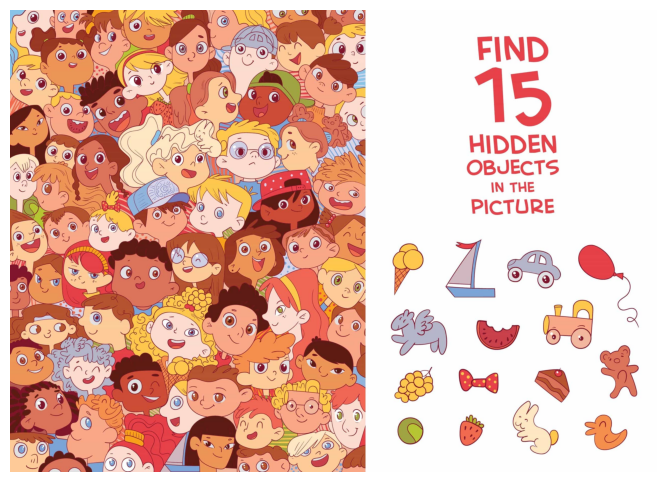

In [9]:
show_image("data/3.jpg")

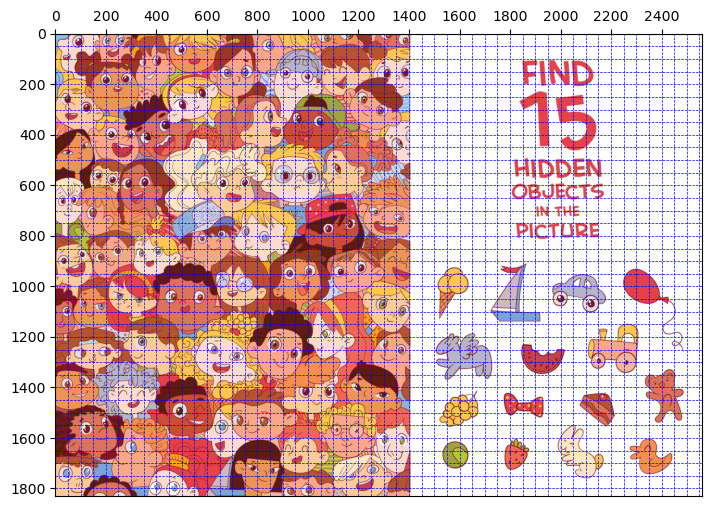

In [10]:
show_image_with_grid("data/3.jpg", grid_size=50)

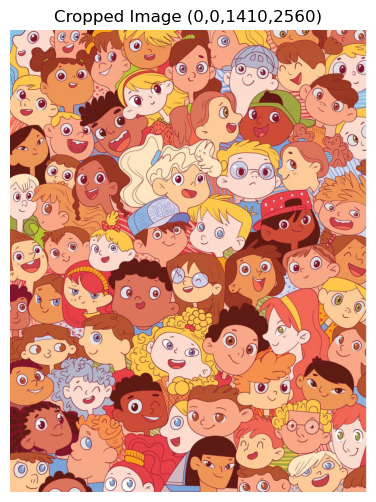

In [11]:
image = cv2.imread("data/3.jpg")
w, h, _ = image.shape

crop_image("data/3.jpg", 0, 0, 1410, h, "crop_image/target_image.jpg")

#### Object to be searched

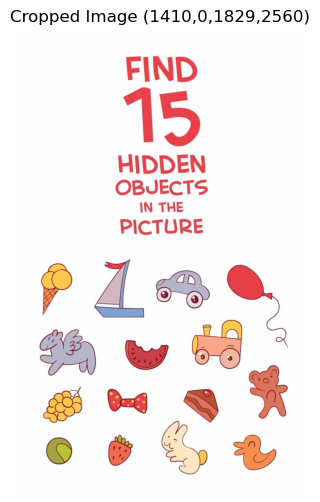

In [12]:
crop_image("data/3.jpg", 1410, 0, w, h, "crop_image/candidate_image.jpg")

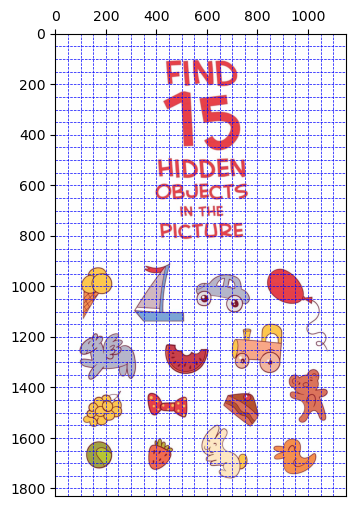

In [13]:
show_image_with_grid("crop_image/candidate_image.jpg", grid_size=50)

In [14]:
crop_image("crop_image/candidate_image.jpg", 50, 900, 200, 250, save_path="crop_image/candidate_image/object_image_1.jpg", show_image=False)

In [15]:
crop_image("crop_image/candidate_image.jpg", 300, 900, 250, 250, save_path="crop_image/candidate_image/object_image_2.jpg", show_image=False)

In [16]:
crop_image("crop_image/candidate_image.jpg", 550, 900, 250, 250, save_path="crop_image/candidate_image/object_image_3.jpg", show_image=False)

In [17]:
crop_image("crop_image/candidate_image.jpg", 800, 900, 250, 250, save_path="crop_image/candidate_image/object_image_4.jpg", show_image=False)

In [18]:
crop_image("crop_image/candidate_image.jpg", 50, 1150, 300, 250, save_path="crop_image/candidate_image/object_image_5.jpg", show_image=False)

In [19]:
crop_image("crop_image/candidate_image.jpg", 400, 1200, 250, 150, save_path="crop_image/candidate_image/object_image_6.jpg", show_image=False)

In [20]:
crop_image("crop_image/candidate_image.jpg", 650, 1100, 250, 250, save_path="crop_image/candidate_image/object_image_7.jpg", show_image=False)

In [21]:
crop_image("crop_image/candidate_image.jpg", 100, 1400, 200, 200, save_path="crop_image/candidate_image/object_image_8.jpg", show_image=False)

In [22]:
crop_image("crop_image/candidate_image.jpg", 350, 1400, 200, 150, save_path="crop_image/candidate_image/object_image_9.jpg", show_image=False)

In [23]:
crop_image("crop_image/candidate_image.jpg", 350, 1400, 200, 150, save_path="crop_image/candidate_image/object_image_9.jpg", show_image=False)

In [24]:
crop_image("crop_image/candidate_image.jpg", 650, 1400, 200, 150, save_path="crop_image/candidate_image/object_image_10.jpg", show_image=False)

In [25]:
crop_image("crop_image/candidate_image.jpg", 900, 1300, 200, 250, save_path="crop_image/candidate_image/object_image_11.jpg", show_image=False)

In [26]:
crop_image("crop_image/candidate_image.jpg", 100, 1600, 150, 150, save_path="crop_image/candidate_image/object_image_12.jpg", show_image=False)

In [27]:
crop_image("crop_image/candidate_image.jpg", 350, 1600, 150, 150, save_path="crop_image/candidate_image/object_image_13.jpg", show_image=False)

In [28]:
crop_image("crop_image/candidate_image.jpg", 550, 1550, 250, 250, save_path="crop_image/candidate_image/object_image_14.jpg", show_image=False)

In [29]:
crop_image("crop_image/candidate_image.jpg", 850, 1600, 200, 150, save_path="crop_image/candidate_image/object_image_15.jpg", show_image=False)

## 2

#### Template matching images

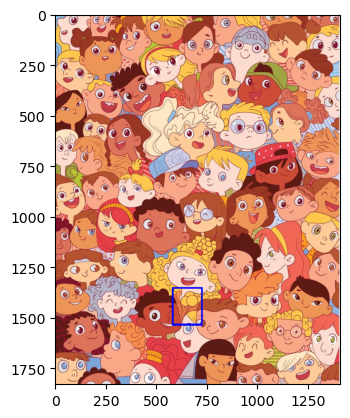

In [191]:
image = cv2.imread("crop_image/target_image.jpg")
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = detect_edges(image_grey)

locations = [np.empty(0), np.empty(0), np.empty(0), np.empty(0)]

candidate = cv2.imread("crop_image/candidate_image/object_image_1.jpg")
candidate_grey = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
candidate_edges = detect_edges(candidate_grey)

_, locations = matching_image(image_edges, candidate_edges, locations, down_threshold=0.2, up_threshold=1.0,
                                          resized_candidate=True, min_scale=0.7, max_scale=0.8, num_scale=30)

_image = draw(image, locations)
plt.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))

In [7]:
def find_optimal_threshold(image_edges):
    hist = cv2.calcHist([image_edges], [0], None, [256], [0, 256])  

    total_pixels = image_edges.size
    edge_pixels = np.sum(hist[128:])  
    edge_ratio = edge_pixels / total_pixels  

    if edge_ratio < 0.05:
        return 0.1  
    elif edge_ratio > 0.2:
        return 0.4  
    else:
        return 0.25 

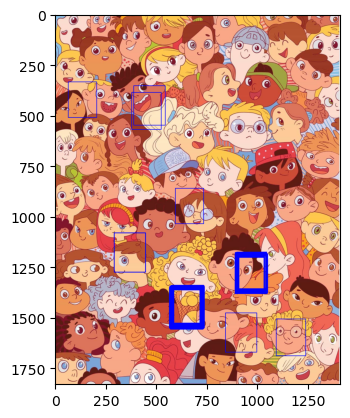

In [192]:
image = cv2.imread("crop_image/target_image.jpg")
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = detect_edges(image_grey)

locations = [np.empty(0), np.empty(0), np.empty(0), np.empty(0)]

candidate = cv2.imread("crop_image/candidate_image/object_image_1.jpg")
candidate_grey = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
candidate_edges = detect_edges(candidate_grey)

_, locations = matching_image(image_edges, candidate_edges, locations, down_threshold=find_optimal_threshold(candidate_edges), up_threshold=1.0,
                                          resized_candidate=True, min_scale=0.7, max_scale=0.8, num_scale=30)

_image = draw(image, locations)
plt.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))

In [9]:
def find_best_threshold(image_edges, candidate_edges, min_scale=0.7, max_scale=1.2, num_scale=30):
    best_threshold = None
    best_match_score = -np.inf  
    best_location = None

    candidate_h, candidate_w = candidate_edges.shape  

    for threshold in np.linspace(0.6, 0.1, 10):  
        _, new_locations = matching_image(image_edges, candidate_edges, locations=None, 
                                          down_threshold=threshold, up_threshold=1.0,
                                          resized_candidate=True, min_scale=min_scale, max_scale=max_scale, num_scale=num_scale)

        num_detections = len(new_locations[0])  
        if num_detections > 0:  
            for i in range(num_detections):
                x, y, w, h = int(new_locations[1][i]), int(new_locations[0][i]), int(new_locations[3][i]), int(new_locations[2][i])

                detected_area = w * h
                candidate_area = candidate_w * candidate_h
                scale_ratio = detected_area / candidate_area

                scale_score = np.exp(-((scale_ratio - 1) ** 2))  

                if scale_score > best_match_score:
                    best_match_score = scale_score
                    best_threshold = threshold
                    best_location = [y, x, h, w]

    return best_threshold, best_location  

In [10]:
def draw(image, location):
    y, x, h, w = map(int, location) 
    
    x1, y1 = x, y
    x2, y2 = x + w, y + h

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  

    return image

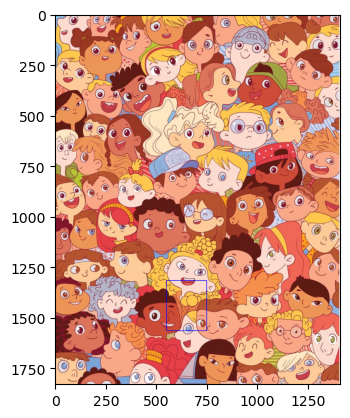

In [11]:
image = cv2.imread("crop_image/target_image.jpg")
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = detect_edges(image_grey)

location = [np.empty(0), np.empty(0), np.empty(0), np.empty(0)]

candidate = cv2.imread("crop_image/candidate_image/object_image_1.jpg")
candidate_grey = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
candidate_edges = detect_edges(candidate_grey)

_, location = find_best_threshold(image_edges, candidate_edges)

_image = draw(image, location)
plt.imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))

In [ ]:
candidate_folder = "crop_image/candidate_image/"
output_folder = "output_images/"
os.makedirs(output_folder, exist_ok=True)  
    
image = cv2.imread("crop_image/target_image.jpg")
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = detect_edges(image_grey)

for filename in os.listdir(candidate_folder):
    if filename.endswith(".jpg"):
        candidate_path = os.path.join(candidate_folder, filename)

        candidate = cv2.imread(candidate_path)
        candidate_grey = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
        candidate_edges = detect_edges(candidate_grey)

        _, location = find_best_threshold(image_edges, candidate_edges)

        image_with_bbox = image.copy()
        if location:
            image_with_bbox = draw(image_with_bbox, location)

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB))
        axes[0].set_title(f"Target: {filename}")
        axes[0].axis("off")

        axes[1].imshow(cv2.cvtColor(candidate, cv2.COLOR_BGR2RGB))
        axes[1].set_title(f"Candidate: {filename}")
        axes[1].axis("off")

        output_path = os.path.join(output_folder, f"result_{filename}")
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.close(fig)  

print(f"✅ Ảnh đã lưu vào thư mục: {output_folder}")

✅ Ảnh đã lưu vào thư mục: output_images/


In [17]:
candidate_folder = "crop_image/candidate_image/"
output_folder = "final_output_folder/"
os.makedirs(output_folder, exist_ok=True)  

image = cv2.imread("crop_image/target_image.jpg")
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_edges = detect_edges(image_grey)

for filename in os.listdir(candidate_folder):
    if filename.endswith(".jpg"):
        candidate_path = os.path.join(candidate_folder, filename)
        
        candidate = cv2.imread(candidate_path)
        candidate_grey = cv2.cvtColor(candidate, cv2.COLOR_BGR2GRAY)
        candidate_edges = detect_edges(candidate_grey)
        
        best_match = None
        best_location = None
        best_scale = 1.0
        best_val = -np.inf
        
        scale_range = np.linspace(0.3, 1.5, 50)
        for scale in scale_range:
            resized_candidate = cv2.resize(candidate_edges, None, fx=scale, fy=scale)
            if resized_candidate.shape[0] > image_edges.shape[0] or resized_candidate.shape[1] > image_edges.shape[1]:
                continue
            
            result = cv2.matchTemplate(image_edges, resized_candidate, cv2.TM_CCOEFF_NORMED)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
            
            if max_val > best_val:
                best_val = max_val
                best_match = resized_candidate
                best_location = max_loc
                best_scale = scale
                
        if best_location:
            top_left = best_location
            h, w = int(candidate.shape[0] * best_scale), int(candidate.shape[1] * best_scale)
            bottom_right = (top_left[0] + w, top_left[1] + h)
            
            _image = image.copy()
            cv2.rectangle(_image, top_left, bottom_right, (0, 0, 0 ), 3)
            
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            axes[0].imshow(cv2.cvtColor(_image, cv2.COLOR_BGR2RGB))
            axes[0].set_title(f"Target: {filename}")
            axes[0].axis("off")
            
            axes[1].imshow(cv2.cvtColor(candidate, cv2.COLOR_BGR2RGB))
            axes[1].set_title(f"Candidate: {filename}")
            axes[1].axis("off")
            
            output_path = os.path.join(output_folder, f"result_{filename}")
            plt.savefig(output_path, bbox_inches='tight', dpi=300)
            plt.close(fig)
            
print(f"✅ Ảnh đã lưu vào thư mục: {output_folder}")

✅ Ảnh đã lưu vào thư mục: final_output_folder/
